In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
order_products = pd.read_csv('Instacart market basket dataset/order_products__train.csv')
orders = pd.read_csv('Instacart market basket dataset/orders.csv')

In [4]:
data = pd.merge(order_products,orders,how='inner',on='order_id')
print(data.shape)
data.head()

(1384617, 10)


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [5]:
data.isna().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [6]:
data.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [7]:
data.sort_values(by=['user_id', 'order_id', 'product_id'], ascending=True, inplace=True)
data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True) 
data.head() 

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1187899,196,1,1,1,train,11,4,8,14.0
1,1187899,10258,6,1,1,train,11,4,8,14.0
2,1187899,13032,7,1,1,train,11,4,8,14.0
3,1187899,25133,2,1,1,train,11,4,8,14.0
4,1187899,26088,8,1,1,train,11,4,8,14.0


In [8]:
number_of_orders = data.groupby('user_id')['order_number'].sum()
number_of_orders

user_id
1         121
2         465
5          45
7         189
8          72
         ... 
206199    440
206200    456
206203     78
206205     76
206209    112
Name: order_number, Length: 131209, dtype: int64

In [9]:
mean_reorder_duration = data.groupby('user_id')['days_since_prior_order'].mean()
mean_reorder_duration

user_id
1         14.0
2         30.0
5          6.0
7          6.0
8         10.0
          ... 
206199    30.0
206200     6.0
206203    30.0
206205    10.0
206209    30.0
Name: days_since_prior_order, Length: 131209, dtype: float64

In [10]:
columns = ['number_of_orders', 'mean_reorder_duration']
final_data = pd.concat([number_of_orders, mean_reorder_duration], axis=1)
final_data.columns = columns

In [11]:
final_data.head()

,number_of_orders,mean_reorder_duration
user_id,,
1,121,14.0
2,465,30.0
5,45,6.0
7,189,6.0
8,72,10.0


In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder 

from sklearn.cluster import KMeans

In [13]:
scaler = StandardScaler()
scaled_fdata = scaler.fit_transform(final_data)

In [14]:
scaled_fdata = pd.DataFrame(scaled_fdata)
scaled_fdata.columns = ['number_of_orders', 'mean_reorder_duration']

In [15]:
scaled_fdata.head()

,number_of_orders,mean_reorder_duration
0,-0.230336,-0.285653
1,1.104461,1.212924
2,-0.525233,-1.034942
3,0.033519,-1.034942
4,-0.420467,-0.660298


In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_fdata)
clusters = kmeans.cluster_centers_
cluster_points = kmeans.fit_predict(scaled_fdata)
df = scaled_fdata
df['cluster'] = cluster_points

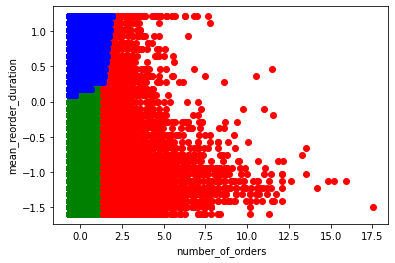

In [17]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['number_of_orders'], df1['mean_reorder_duration'], color='green')
plt.scatter(df2['number_of_orders'], df2['mean_reorder_duration'], color='red')
plt.scatter(df3['number_of_orders'], df3['mean_reorder_duration'], color='blue')

plt.xlabel('number_of_orders')
plt.ylabel('mean_reorder_duration')

plt.show()

In [18]:
df = df.groupby('cluster').mean()

In [19]:
ndf = df.copy()

for col in ndf.columns:
    ndf[col] = ((ndf[col] - ndf[col].min()) / (ndf[col].max() - ndf[col].min()) * (1 - 0.2)) + 0.2

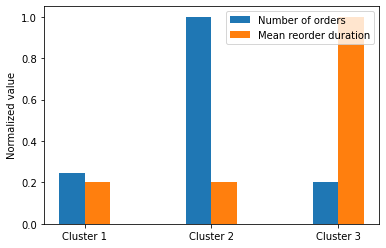

In [21]:
x = ['Cluster 1', 'Cluster 2', 'Cluster 3']
x_axis = np.arange(len(x))


plt.bar(x_axis - 0.1, ndf['number_of_orders'], 0.2, label = 'Number of orders')
plt.bar(x_axis + 0.1, ndf['mean_reorder_duration'], 0.2, label = 'Mean reorder duration')

plt.xticks(x_axis, x)
plt.ylabel('Normalized value')
plt.legend()
plt.show()